# Let us work with some Social media data
## Goal is to understand user behavior one variable at a time

In [2]:
path = 'datasets//social_data.csv'
data <- read.csv(path)

## View first 6 rows

In [4]:
head(data)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0


In [3]:
#What does names do?
names(data)

[1] "userid"                "age"                   "dob_day"              
 [4] "dob_year"              "dob_month"             "gender"               
 [7] "tenure"                "friend_count"          "friendships_initiated"
[10] "likes"                 "likes_received"        "mobile_likes"         
[13] "mobile_likes_received" "www_likes"             "www_likes_received"

## Datatypes of each data

In [5]:
str(data)

'data.frame':	99003 obs. of  15 variables:
 $ userid               : int  2094382 1192601 2083884 1203168 1733186 1524765 1136133 1680361 1365174 1712567 ...
 $ age                  : int  14 14 14 14 14 14 13 13 13 13 ...
 $ dob_day              : int  19 2 16 25 4 1 14 4 1 2 ...
 $ dob_year             : int  1999 1999 1999 1999 1999 1999 2000 2000 2000 2000 ...
 $ dob_month            : int  11 11 11 12 12 12 1 1 1 2 ...
 $ gender               : Factor w/ 2 levels "female","male": 2 1 2 1 2 2 2 1 2 2 ...
 $ tenure               : int  266 6 13 93 82 15 12 0 81 171 ...
 $ friend_count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ friendships_initiated: int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes_received       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes_received: int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes_received   : int  0 0 0

In [6]:
#We will make use of ggplot 2 package. Used for visualizations.
#install.packages("ggplot2")
library("ggplot2")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


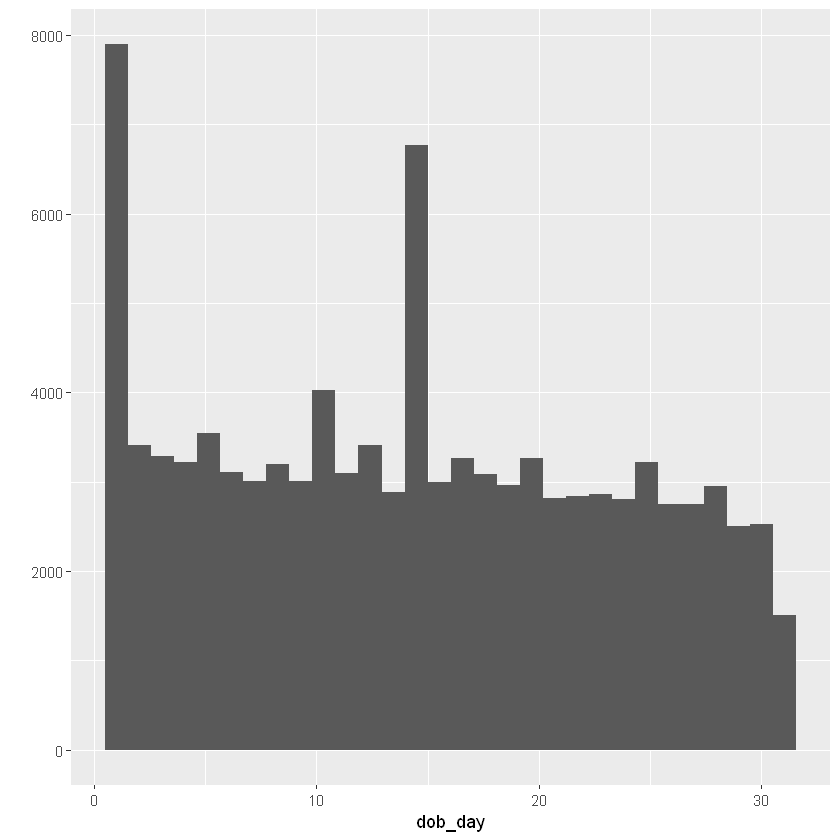

In [7]:
#Use qplot function to plot a histogram. For example, let us plot 
# date of birth by day.
#What do you expect to find?
qplot(x=dob_day,data=data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


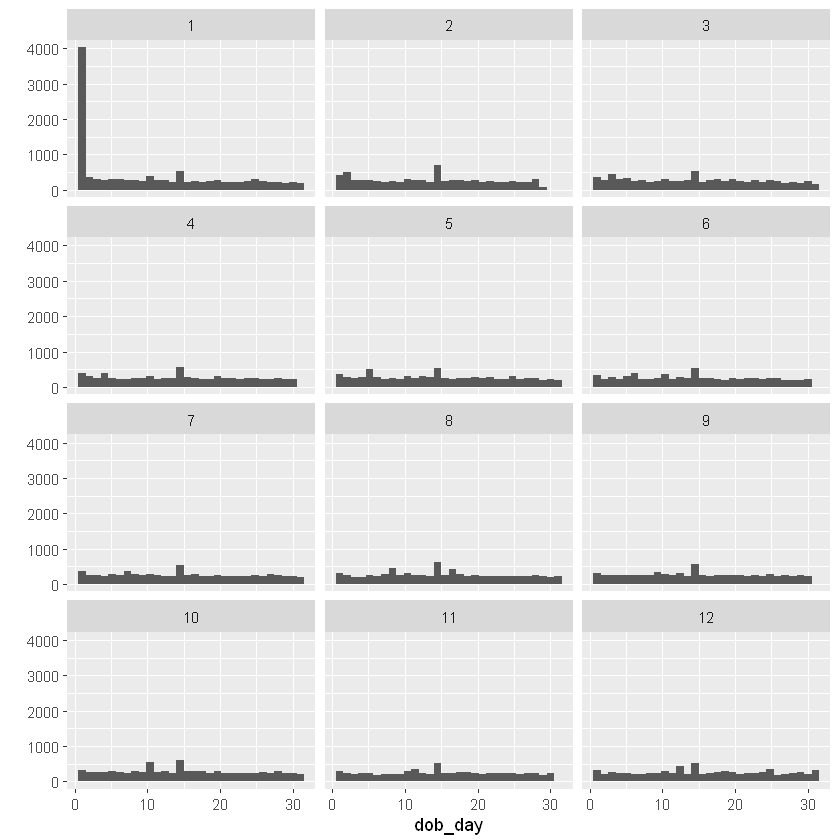

In [10]:
#What does this code do? 
#What insights can you derive?
qplot(x=dob_day,data=data) + facet_wrap(~dob_month,ncol=3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


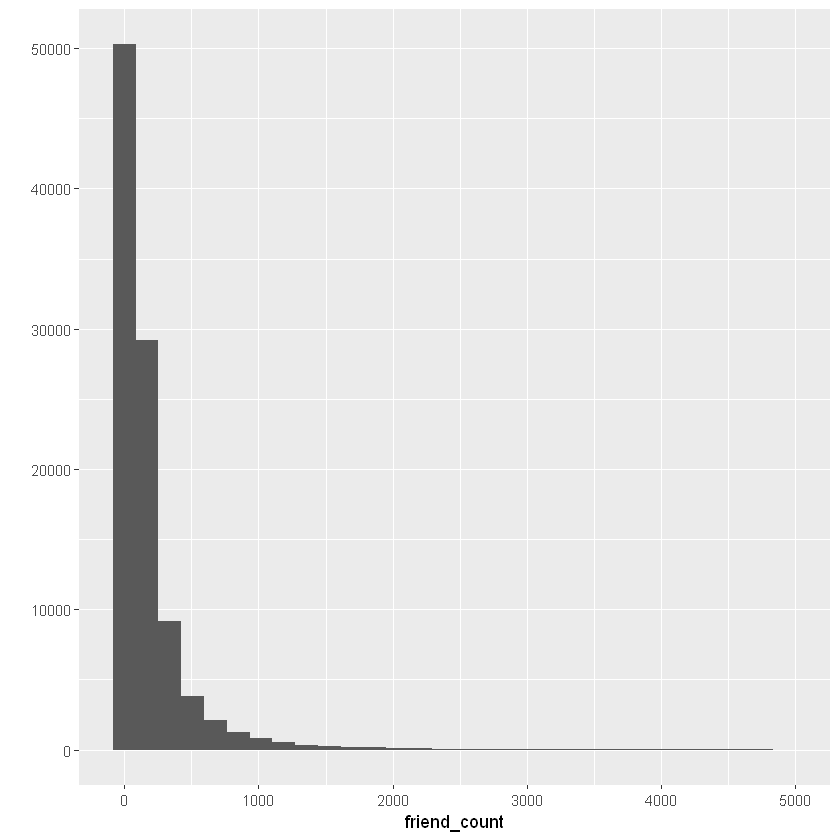

In [11]:
#Create a histogram of friend count
qplot(x=friend_count, data=data)
#What do you find?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

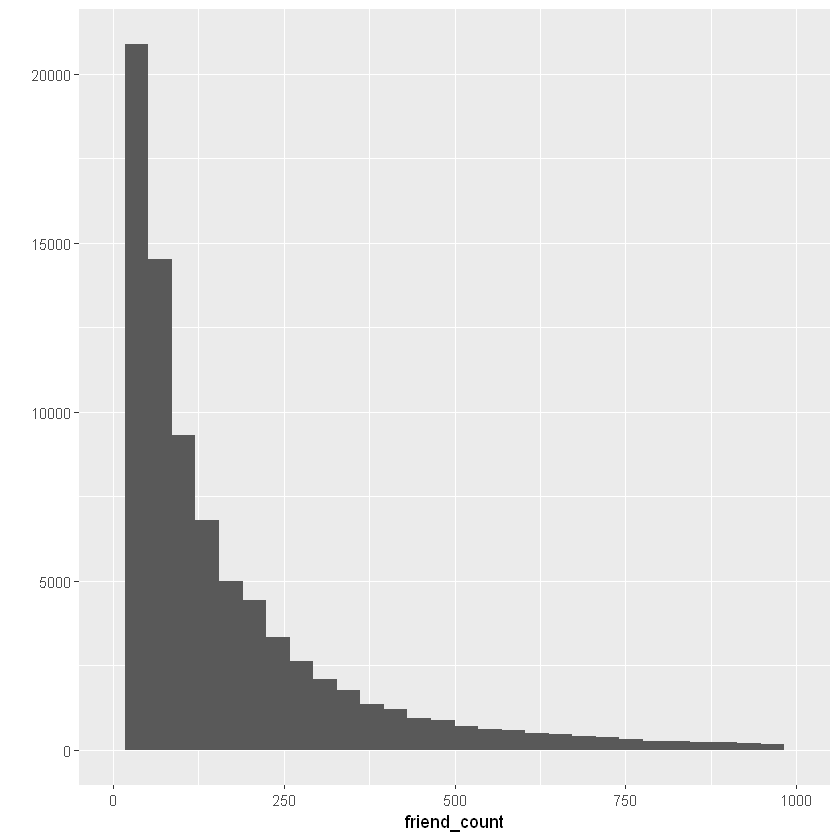

In [12]:
#Let us limit count and then see
qplot(x=friend_count, data=data, xlim=c(0,1000))

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."Warning message:
"Removed 6 rows containing missing values (geom_bar)."

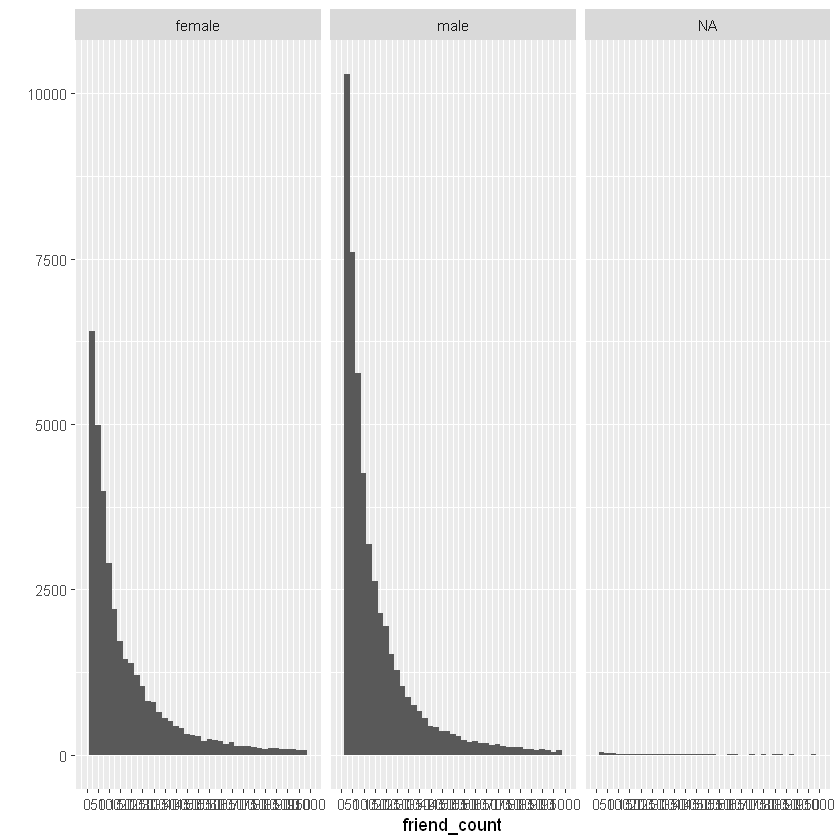

In [15]:
#Let us look at friend count by gender
qplot(x=friend_count, data=data, binwidth=25) + 
  scale_x_continuous(limits=c(0,1000),breaks=seq(0,1000,50))+
  facet_wrap(~gender, scales="fixed")

Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."Warning message:
"Removed 4 rows containing missing values (geom_bar)."

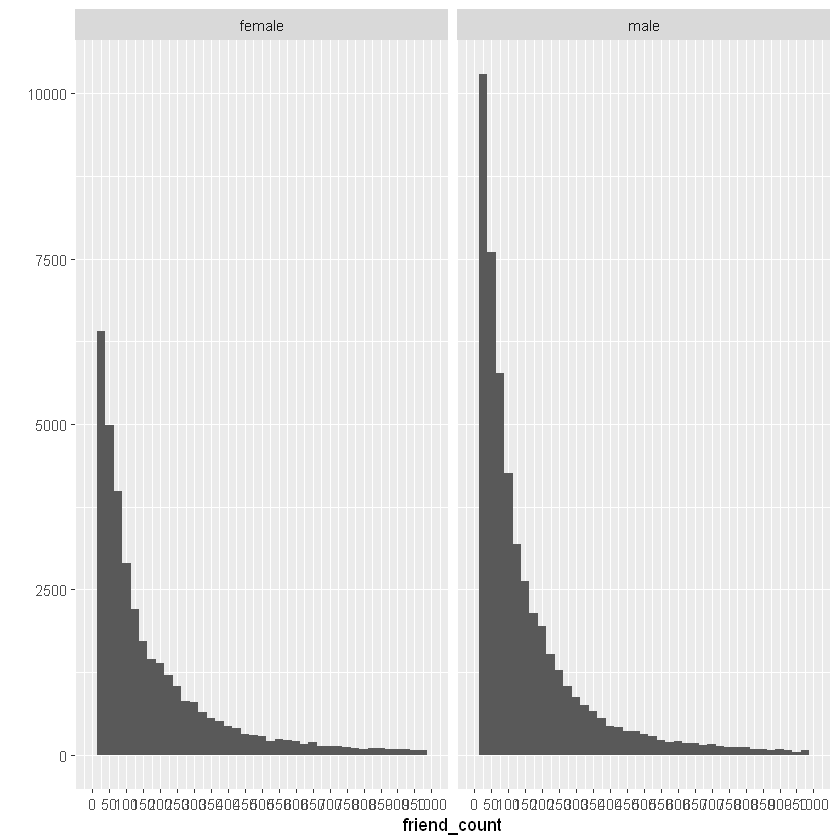

In [16]:
#Let us omit NA values
qplot(x=friend_count, data=subset(data,!is.na(gender)), binwidth=25) + 
  scale_x_continuous(limits=c(0,1000),breaks=seq(0,1000,50))+
  facet_wrap(~gender)
#By looking at above plots can you tell which gender has more friends 
#on average?

In [17]:
#Which gender has more friends by average? Is median better than mean?
#Long tailed data. Median is better measure than mean.
table(data$gender)
by(data$friend_count, data$gender, summary)


female   male 
 40254  58574 

data$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
data$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

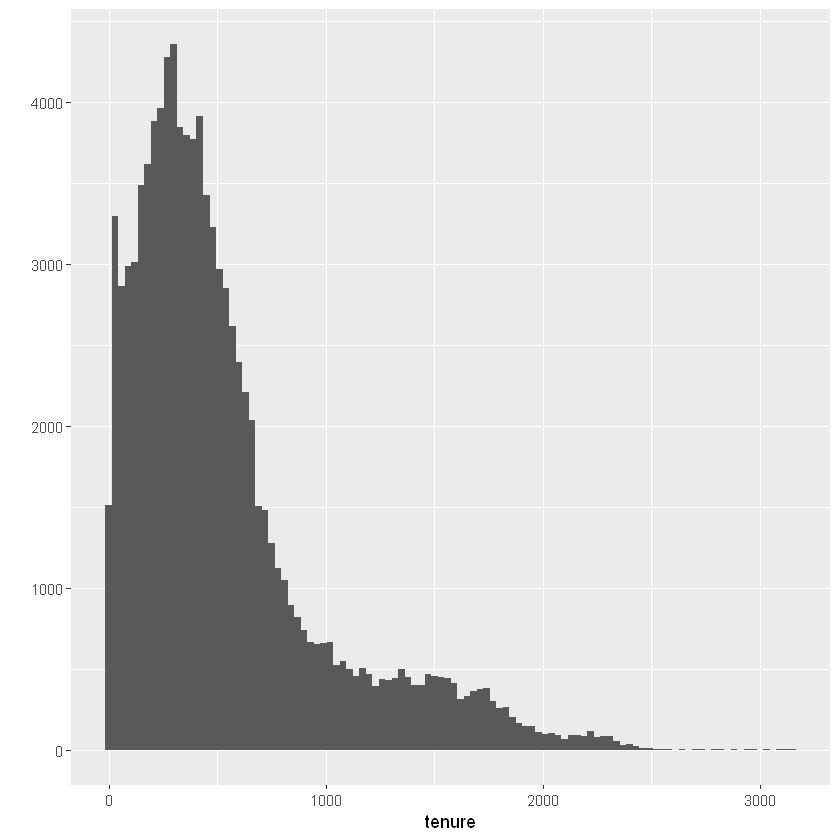

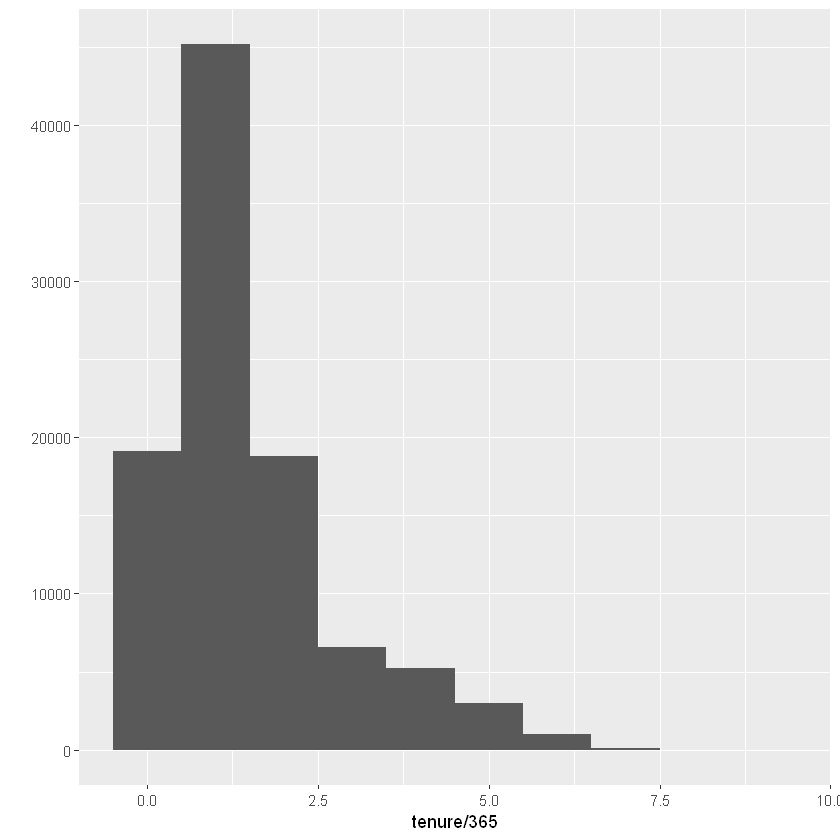

In [18]:
#Since how long people are using FB?
qplot(x=tenure, data=data, binwidth=30)
#Create in years
qplot(x=tenure/365, data=data, binwidth=1)

In [ ]:
#What can we say about ages? What is min age?
qplot(x=age, data=data, binwidth=1)
summary(data$age)

#Let us transform some data. What about friend count variable? It is long tail variable.
#These are over dispersed data. We transform them so that their tail is 
# shortened
qplot(x=friend_count,data=data)
summary(data$friend_count)

summary(log(data$friend_count))
#What is going on?


summary(log(data$friend_count+1))

#another kind of transformation
summary(sqrt(data$friend_count))

qplot(x=friend_count,data=data)

qplot(x=log(friend_count+1),data=data)

#Let us create multiple histograms on one plot
install.packages('gridExtra')
library(gridExtra)

a<-qplot(x=friend_count,data=data)
b<-qplot(x=log(friend_count+1),data=data)
c<-qplot(x=sqrt(friend_count),data=data)

grid.arrange(a,b,c,ncol=1)
#What can we say about these?


#Let us now look at likes. How would this help your business?
by(data$www_likes,data$gender,sum)


#Box plot. How does it look? How many outliers are there?
qplot(x=gender, y=friend_count, data=subset(data,!is.na(gender)),geom='boxplot')


qplot(x=gender, y=friend_count, data=subset(data,!is.na(gender)),geom='boxplot',ylim=c(0,1000))

qplot(x=gender, y=friend_count, data=subset(data,!is.na(gender)),geom='boxplot')+
  coord_cartesian(ylim=c(0,1000))
#Differences between the above two commands?

#Let us now look at who initiates more friend requests
qplot(x=gender, y=friendships_initiated, data=subset(data,!is.na(gender)),geom='boxplot')+
  coord_cartesian(ylim=c(0,1000))

by(data$friendships_initiated, data$gender, summary)


#What about mobile devices?
summary(data$mobile_likes)
#What percentage of people use mobile devices?
summary(data$mobile_likes>0)

#Exercise: Repeat the same set of commands for sets of first 100, 1000, 
#10,000, and 50,000 observations and report your general observations.